In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [3]:
boston = load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
features = pd.DataFrame(boston.data, columns = boston.feature_names)
target = pd.DataFrame(boston.target, columns = ["Target"])

In [6]:
data = pd.concat([features, target], axis=1)

In [13]:
data.head(10) #to see only top rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [12]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [7]:
correlation = data.corr('pearson')
correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [8]:
abs(correlation['Target']).sort_values()

CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
AGE        0.376955
RAD        0.381626
CRIM       0.388305
NOX        0.427321
TAX        0.468536
INDUS      0.483725
PTRATIO    0.507787
RM         0.695360
LSTAT      0.737663
Target     1.000000
Name: Target, dtype: float64

In [9]:
x = data['RM']
y = data['Target']
z = data['LSTAT']

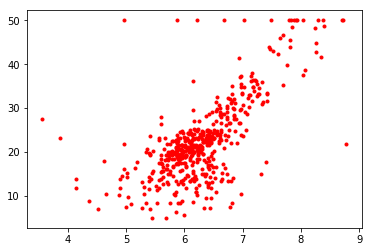

In [10]:
plt.plot(x,y,'r.')

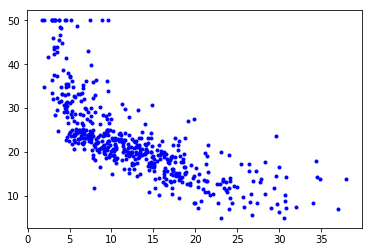

In [11]:
plt.plot(z,y,'b.')

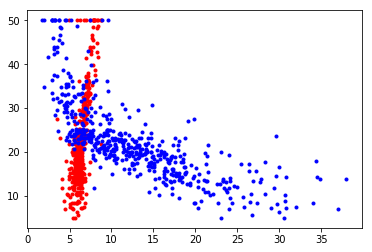

In [12]:
plt.plot(x,y,'r.',z,y,'b.')

In [13]:
#normalization
x = (x- x.min())/(x.max()-x.min())
y = (y-x.min())/(y.max() - y.min())
z = (z - z.min())/(z.max()- z.min())

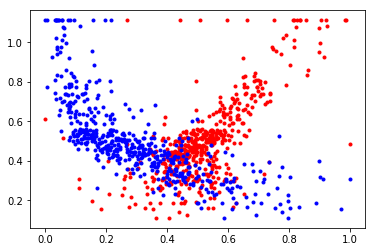

In [14]:
plt.plot(x,y,'r.',z,y,'b.')


In [15]:
# np is faster and consumes less memory so convert data to np
x = np.array(x)
z = np.array(z)
y = np.array(y)

In [16]:
#divide datasets to train and test
x_train, x_test, y_train, y_test, z_train,z_test = train_test_split(x,y,z,test_size = 0.2)

In [17]:
x_train.size


404

In [22]:
x_test.size

102

In [23]:
def hypothesis(a, x, b, z, c):
    return a * x + b * z + c

In [73]:
def error(a,x,b,z,c,y):
    e = 0
    m = len(x) #length of data set
    
    for i in range(m):
        e += np.power((hypothesis(a,x[i],b, z[i],c) - y[i]),2)
        
    return (1 /(2* m))*e

In [74]:
def step_gradient(a,x,b,z,c,y,learning_rate):
    grad_a = 0
    grad_b = 0
    grad_c = 0
    m = len(x)
    
    for i in range(m):
        grad_a+=(1/m)*(hypothesis(a,x[i],b,z[i],c)-y[i])*x[i]
        grad_b+=(1/m)*(hypothesis(a,x[i],b,z[i],c)-y[i])*z[i]
        grad_c+=(1/m)*(hypothesis(a,x[i],b,z[i],c)-y[i])
        
    a = a - grad_a * learning_rate
    b = b - grad_b * learning_rate
    c = c - grad_c * learning_rate
    
    return a, b, c

In [75]:
def descend(init_a, x, init_b,z,init_c, y, learning_rate, iterations):
    a = init_a
    b =init_b
    c = init_c
    
    for i in range(iterations):
        e = error(a,x,b,z,c,y)
        
        if i %1000 == 0:
            print(f"Error:{np.sqrt(e)}, a:{a},b:{b},c:{c}")
            
        a,b,c = step_gradient(a,x,b,z,c,y,learning_rate)
        
    return a,b,c

In [81]:
a = 0.5601594139531625
b = -0.5229532654136213
c = 0.36759509271980845
learning_rate = 0.001
iterations = 10000

In [82]:
final_a,final_b,final_c = descend(a,x_train,b,z_train,c,y_train,learning_rate,iterations)

Error:0.08921076262264253, a:0.5601594139531625,b:-0.5229532654136213,c:0.36759509271980845
Error:0.08921076262264253, a:0.5601594139531625,b:-0.5229532654136213,c:0.36759509271980845
Error:0.08921076262264253, a:0.5601594139531625,b:-0.5229532654136213,c:0.36759509271980845
Error:0.08921076262264253, a:0.5601594139531625,b:-0.5229532654136213,c:0.36759509271980845
Error:0.08921076262264253, a:0.5601594139531625,b:-0.5229532654136213,c:0.36759509271980845
Error:0.08921076262264253, a:0.5601594139531625,b:-0.5229532654136213,c:0.36759509271980845
Error:0.08921076262264253, a:0.5601594139531625,b:-0.5229532654136213,c:0.36759509271980845
Error:0.08921076262264253, a:0.5601594139531625,b:-0.5229532654136213,c:0.36759509271980845
Error:0.08921076262264253, a:0.5601594139531625,b:-0.5229532654136213,c:0.36759509271980845
Error:0.08921076262264253, a:0.5601594139531625,b:-0.5229532654136213,c:0.36759509271980845


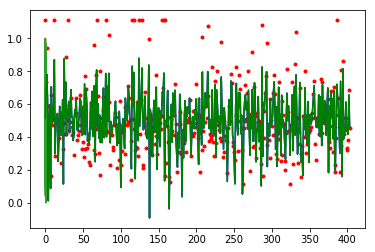

In [83]:
plt.plot(x_train,z_train, y_train, 'r.',
        x_train, z_train, hypothesis(a,x_train,b,z_train,c),'b',
        x_train,z_train, hypothesis(final_a, x_train,final_b,z_train,final_c),'g')

In [84]:
final_a, final_b, final_c

(0.5601594139531625, -0.5229532654136213, 0.36759509271980845)

In [85]:
x_test[:3]

array([0.41770454, 0.48285112, 0.43993102])

In [86]:
y_test[:3]

array([0.41555556, 0.44444444, 0.29555556])

In [87]:
hypothesis(final_a,x_test[:3],final_b,z_test[:3],final_c)

array([0.43678245, 0.45090799, 0.33133745])

In [88]:
np.sqrt(error(final_a,x_test,final_b,z_test,final_c,y_test))

0.07674438068002759